#**1CK130: Assignment 2**
*Lecturers: dr. Bram De Moor, dr. Mirjam Meijer, Emre Kara Msc.*


---

Velocation is a bike-rental operator in Paris with 20 rental stations and a fleet of 1,000 bikes. Each station can hold an unlimited number of bikes. Customers may rent a bike any time between 08:00 and 20:00 and may return it to any station (not necessarily the one where they rented it).

Every night Velocation reallocates the 1,000 bikes across the 20 stations to set the starting inventory for the next day. Today they split bikes evenly (50 per station), but this uniform allocation leads to stockouts at some stations and therefore lost demand (customers turned away who do not seek service elsewhere).

To move beyond the current uniform but inefficient allocation, Velocation seeks your expertise. Using simulation-based analysis, your task is to determine the optimal nightly distribution of the 1000 bikes across the 20 locations, with the objective of maximizing the overall service level, defined as: 1 - (customers turned away / total customers).

Velocation gives you access to the following data:

## Data

### Customer arrivals
Over the past years, Velocation has carefully tracked customer arrivals and now possesses a reliable estimate of the average daily demand at each rental location. The list below summarizes these values. For example, location 0 has an average daily demand of 130 rentals, while location 1 averages 60 rentals, and so on. You can assume that customer arrivals are Poisson distributed.

In [1]:
avg_daily_demand_per_loc = [130, 60, 108,  66,  105,  84,  51,  65,  151,  75,  77,  65,  92,  72,  91,  68,  85,  41, 120,  80]

Velocation observed that customer demand fluctuates throughout the day, with distinct peak and off-peak periods. To better understand these patterns, they collected detailed arrival data from five representative rental stations.

In [2]:
demand_per_hour1 = {'8-9': 2, '9-10': 8, '10-11': 25, '11-12': 13, '12-13': 5, '13-14': 16, '14-15': 13, '15-16': 5, '16-17': 2, '17-18': 1, '18-19': 0, '19-20': 0}
demand_per_hour2 = {'8-9': 1, '9-10': 5, '10-11': 16, '11-12': 9, '12-13': 3, '13-14': 10, '14-15': 8, '15-16': 3, '16-17': 1, '17-18': 0, '18-19': 1, '19-20': 1}
demand_per_hour3 = {'8-9': 1, '9-10': 7, '10-11': 23, '11-12': 13, '12-13': 2, '13-14': 19, '14-15': 9, '15-16': 5, '16-17': 1, '17-18': 0, '18-19': 1, '19-20': 0}
demand_per_hour4 = {'8-9': 3, '9-10': 12, '10-11': 40, '11-12': 19, '12-13': 10, '13-14': 30, '14-15': 23, '15-16': 7, '16-17': 3, '17-18': 1, '18-19': 0, '19-20': 1}
demand_per_hour5 = {'8-9': 1, '9-10': 15, '10-11': 19, '11-12': 16, '12-13': 6, '13-14': 9, '14-15': 12, '15-16': 6, '16-17': 2, '17-18': 0, '18-19': 1, '19-20': 1}

### Rental durations
Most of Velocation’s customers are tourists who rent bikes for city tours and sightseeing, typically for part of the day rather than the entire day. To study rental durations, Velocation analyzed a large sample of historical rentals from a representative station. The analysis showed that rental times approximately follow a normal distribution, with an average duration of 3.8 hours and a standard deviation of 1.4 hours. (Note that, while the normal distribution technically allows negative values, this is not relevant in practice for rental times.)

### Return locations
Bikes are not always returned to the same location where they were rented. After careful analysis, Velocation identified the following pattern:
60% of customers return their bike to the original rental location.
For the remaining 40% of rentals, the return location follows a probabilistic distribution defined by the list `return_loc_fraction`.
The values in `return_loc_fraction` sum to 40% and specify, for each location, the probability that a bike is returned there excluding the 60% chance of returning to the rental location.

The list should be interpreted as follows: If a bike is rented from any location other than location 0, there is a 1.42% chance it will be returned to location 0.
If a bike is rented from location 0, then the probability of returning there is 60% + 1.42% = 61.42%. The probability of returning to location 1 when rented from location 0 is 2.41%, and so on.

In [3]:
return_loc_fraction= [0.0142, 0.0241, 0.0312, 0.0112, 0.0123, 0.0312, 0.0100, 0.0451, 0.0211, 0.0174, 0.0154, 0.0164, 0.0322, 0.0138, 0.0174, 0.0152, 0.0210, 0.0312, 0.0096, 0.0100]

## Questions
Develop an event-driven simulation of Velocation's bike rental network in Paris to answer the following questions:

1.   Evaluate Velocation’s current bike distribution strategy, which consists of evenly allocating bikes across all stations each morning. Assess the overall service level of the network under this approach. In addition, analyze at what locations stockouts mainly occur and present your findings with a nice visualization.
2.   Try to come up with a bike distribution over the stations that leads to a higher overal service level. You can manually come up with new (well-motivated) distributions, or use more sophisticated algorithms.

When grading, we consider the following (see full rubric on Canvas):
1.   Does your code run? Is it clear and well-annotated? (10%)
2.   Are your modelling assumptions motivated and reasonable? (25%)
3.   Is your approach to optimize the bike redistribution well-motivated and innovative? (20%)
4.   Do you present your results in a clear, statistically correct, and visually appealing manner? (25%)  
5.   Do you correctly interpret and discuss your results? (20%)

## Coding considerations and tips


*   You are allowed and encouraged to use the material (classes, functions,...) from Assignment 1.
*   You probably need an `FutureEventSet` class as well as a `CustomerArrivalEvent` and a `BikeReturnEvent`. Note that both events now also need an attribute `location` that refers to the location where the bike is withdrawn from or returned. This `location` is a number between `0`and `19` (since we have 20 locations). At the beginning of a day, you can "fill" the FES by generating hourly arrivals for each location. Check in Assignment 1 which function could be useful here.
*   It would be wise to encapsulate your simulation in a function that takes the initial bike distribution as an input to allow you to easily compare different distributions. Given that there is some stochasticity in the simulation, it is important to do a number of replications, to avoid randomness from impacting the outcomes too much. It may also be beneficial to control the randomness by controlling the seed, so that different bike distributions are evaluated using the same demand sequences.



## Answers
Answer the questions here. Make sure that you annotate your code. Additionally, add some text cells to explain / motivate your approach and discuss your results.

### Modeling Assumptions

Before starting, here are the main assumptions I'm making:

1. **Customer Arrivals**: Customers arrive following a Poisson process (random arrivals). I'm using the hourly pattern from the 5 example stations and scaling it to match each station's actual demand.

2. **Rental Duration**: Using a normal distribution (mean = 3.8 hours, std = 1.4 hours) as given in the problem. I make sure duration doesn't go negative.

3. **Return Locations**: 
   - 60% of bikes get returned to the same station
   - 40% get returned somewhere else based on the given probabilities
   
4. **Stockouts**: When a station runs out of bikes, customers just leave (lost demand - they don't wait).

5. **Operating Hours**: One day from 8:00 to 20:00 (12 hours).

6. **No Repositioning**: Once bikes are allocated in the morning, they stay where they are (no moving bikes around during the day).

These assumptions seem reasonable for this analysis.

**ALL IMPORTANT IMPORTS**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import heapq
import random # for weighted random choices
from concurrent.futures import ThreadPoolExecutor  # to perform parallel simulations 
import pandas as pd
import math # for stats functions
from statistics import mean, stdev  # for stats functions



In [5]:
avg_daily_demand_per_loc = [130, 60, 108,  66,  105,  84,  51,  65,  151,  75,  77,  65,  92,  72,  91,  68,  85,  41, 120,  80]


demand_per_hour1 = {'8-9': 2, '9-10': 8, '10-11': 25, '11-12': 13, '12-13': 5, '13-14': 16, '14-15': 13, '15-16': 5, '16-17': 2, '17-18': 1, '18-19': 0, '19-20': 0}
demand_per_hour2 = {'8-9': 1, '9-10': 5, '10-11': 16, '11-12': 9, '12-13': 3, '13-14': 10, '14-15': 8, '15-16': 3, '16-17': 1, '17-18': 0, '18-19': 1, '19-20': 1}
demand_per_hour3 = {'8-9': 1, '9-10': 7, '10-11': 23, '11-12': 13, '12-13': 2, '13-14': 19, '14-15': 9, '15-16': 5, '16-17': 1, '17-18': 0, '18-19': 1, '19-20': 0}
demand_per_hour4 = {'8-9': 3, '9-10': 12, '10-11': 40, '11-12': 19, '12-13': 10, '13-14': 30, '14-15': 23, '15-16': 7, '16-17': 3, '17-18': 1, '18-19': 0, '19-20': 1}
demand_per_hour5 = {'8-9': 1, '9-10': 15, '10-11': 19, '11-12': 16, '12-13': 6, '13-14': 9, '14-15': 12, '15-16': 6, '16-17': 2, '17-18': 0, '18-19': 1, '19-20': 1}


return_loc_fraction= [0.0142, 0.0241, 0.0312, 0.0112, 0.0123, 0.0312, 0.0100, 0.0451, 0.0211, 0.0174, 0.0154, 0.0164, 0.0322, 0.0138, 0.0174, 0.0152, 0.0210, 0.0312, 0.0096, 0.0100]

start_time = 8
end_time = 20
number_of_bikes = 1000


# Adding rental duration sampling function
MEAN_RENTAL_DURATION = 3.8   # hours
STD_RENTAL_DURATION = 1.4    # hours

def sample_rental_duration():
    duration = np.random.normal(MEAN_RENTAL_DURATION, STD_RENTAL_DURATION)
    return max(0, duration)   # prevent negative values


### Simulation engine

The simulation engine consists of:
- **Event classes**: CustomerArrivalEvent and BikeReturnEvent with location tracking
- **FutureEventSet**: Priority queue to manage events in chronological order
- **Helper functions**: To scale demand patterns, generate arrivals, and simulate bike returns
- **Core simulation logic**: Event-driven simulation processing customer arrivals and bike returns

In [6]:
class CustomerArrivalEvent:
    def __init__(self, time, location):
        self.time = time
        self.location = location

    def __lt__(self, other):
        return self.time < other.time

    def get_location(self):     
        return self.location

    def __str__(self):
        return f'Customer arrival at t = {self.time} and location = {self.location}'


class BikeReturnEvent:
    def __init__(self, time, location):
        self.time = time
        self.location = location

    def __lt__(self, other):
        return self.time < other.time

    def get_location(self):     
        return self.location

    def __str__(self):
        return f'Bike return at t = {self.time} and location = {self.location}'


class FutureEventSet:
  def __init__(self):
    self.events = []

  # Add a new event to the FES at the position of occurrence.
  def add(self, event):
    heapq.heappush(self.events, event)

  # Return the first element of the FES and 'pop' it out.
  def next(self):
    return heapq.heappop(self.events)

  # Check if the FES is empty.
  def isEmpty(self):
    return len(self.events) == 0

  # To print the FES correctly, we need to sort it since heapq does not store
  # elements in sorted order, but only guarantees that the smallest element is
  # at index 0.
  def __str__(self):
    sortedEvents = sorted(self.events)
    return '\n'.join(str(e) for e in sortedEvents)

# New function to extract hourly rates from demand_per_hour dictionary
def hourly_rates_scraper(demand_per_hour):
    hourly_rates = []
    for i in demand_per_hour.values():
        hourly_rates.append(i)
    return hourly_rates


# Creating a variable "average_hourly_rates" to get mean hourly_rates from multiple locations to get a more general hourly rates pattern.
Multiple_location_hourly_rates = [demand_per_hour1, demand_per_hour2, demand_per_hour3, demand_per_hour4, demand_per_hour5]
hourly_rates_list = []
for location in Multiple_location_hourly_rates:
    hourly_rates = hourly_rates_scraper(location)
    hourly_rates_list.append(hourly_rates)

average_hourly_rates = np.mean(hourly_rates_list, axis=0).tolist()


# Function to calculate service level as a percentage
# Service Level = (1 - turned_away / total_demand) * 100%
def service_level(customers_turned_away, total_demand):
    service_level = (1 - (customers_turned_away / total_demand)) * 100 if total_demand > 0 else 100.0
    return (f'{service_level}%')


# Function to estimate where the bike will be returned
def return_bike(start_station: int) -> int:
    options = list(range(20))
    weights = [0.0142, 0.0241, 0.0312, 0.0112, 0.0123, 0.0312, 0.0100, 0.0451, 0.0211, 0.0174, 0.0154, 0.0164, 0.0322, 0.0138, 0.0174, 0.0152, 0.0210, 0.0312, 0.0096, 0.0100] 
    # 60% chance to return to the original station
    if random.random() < 0.6:
        return start_station
    
    # 40% block: choose according to the fractions
    # random.choices automatically normalizes
    return random.choices(options, weights=weights, k=1)[0]




def get_scaled_hourly_rates(location_index, avg_daily_demand_per_loc, hourly_pattern):
    """
    Scale a generic hourly pattern to match the specific location's daily demand.
    
    Args:
        location_index: Station number (0-19)
        avg_daily_demand_per_loc: List of daily demands for each station
        hourly_pattern: List of hourly rates (e.g., average_hourly_rates)
    
    Returns:
        Scaled hourly rates for the specific location
    """
    daily_demand_for_loc = avg_daily_demand_per_loc[location_index]
    total_in_pattern = sum(hourly_pattern)
    
    # Scale factor to match the location's actual daily demand
    scale_factor = daily_demand_for_loc / total_in_pattern
    
    scaled_rates = [rate * scale_factor for rate in hourly_pattern]
    return scaled_rates


  
# We import the GetArrivalTimesByHour function from Assignment 1. This function generates customer arrival times based on hourly rates.

def GetArrivalTimesByHour(start_hour, end_hour, hourly_rates):
    # Check if hourly_rates list is valid.
    expected_length = end_hour - start_hour
    if len(hourly_rates) != expected_length:
      raise ValueError(f'hourly_rates list must have at least {expected_length} elements, but got {len(hourly_rates)}!')
    if any(rate < 0 for rate in hourly_rates):
      raise ValueError('All rates in hourly_rates must be non-negative!')

    # Generate customer arrivals per hour.
    arrivals = []
    for hour in range(start_hour, end_hour):
      rate_index = hour - start_hour
      rate = hourly_rates[rate_index]
      scale_parameter = 1.0 / rate
      next_time = hour
      while next_time < hour + 1:
        next_time += np.random.exponential(scale=scale_parameter)
        if next_time < hour + 1:
          arrivals.append(next_time)

    return arrivals

 

In [7]:
def simulate_one_station(loc, start_time, end_time, hourly_rates, bikes_initial):
    """
    Simulate a single bike station.
    """
    # bike_initial = 50 if not provided
    bikes_initial = bikes_initial if bikes_initial is not None else 50

    # Scale hourly rates for this specific location
    hourly_rates = get_scaled_hourly_rates(loc, avg_daily_demand_per_loc, average_hourly_rates)

    # Generate arrival times for this station
    arrivals = GetArrivalTimesByHour(start_time, end_time, hourly_rates)
    fes = FutureEventSet()

    # Add all customer arrival events to the event set
    for arrival in arrivals:
        fes.add(CustomerArrivalEvent(arrival, loc))

    bikes_available = bikes_initial
    num_cust_turned_away = 0

    # Main event loop
    while not fes.isEmpty():
        event = fes.next()


        if isinstance(event, CustomerArrivalEvent):
            if bikes_available > 0:
                rental_duration = sample_rental_duration()

                bikes_available -= 1
                return_time = event.time + rental_duration

                # Determine return location (60% same station, 40% distributed randomly)
                return_event = BikeReturnEvent(return_time, return_bike(loc))
                fes.add(return_event)
            else:
                num_cust_turned_away += 1

        else:
            # BikeReturnEvent
            bikes_available += 1


    total_demand = len(arrivals)
    service = service_level(num_cust_turned_away, total_demand)

    return {
        "station": loc,
        "total_demand": total_demand,
        "turned_away": num_cust_turned_away,
        "service_level": service,
    }


def PerformSimulation(start_time, end_time, hourly_rates, number_of_loc, bike_distribution=None, max_workers=None):
    """
    Run the simulation for all stations in parallel (threads) and
    return a list of per-station result dicts.
    
    bike_distribution: list of 20 integers specifying bikes per station, or None for default (50 per station)
    """
    # Default: 50 bikes per station
    if bike_distribution is None:
        bike_distribution = [50] * number_of_loc
    
    results = []

    with ThreadPoolExecutor(max_workers=max_workers or number_of_loc) as executor:
        futures = [
            executor.submit(simulate_one_station, loc, start_time, end_time, hourly_rates, bike_distribution[loc])
            for loc in range(number_of_loc)
        ]

        for f in futures:
            # if something goes wrong, this will raise the REAL exception
            res = f.result()
            results.append(res)

    return results


def run_multiple_replications(n_replications, start_time, end_time, bike_distribution=None):
    """
    Run multiple replications with a given bike distribution.
    
    bike_distribution: list of 20 integers, or None for default (50 per station)
    """
    all_results = []
    
    for rep in range(n_replications):
        np.random.seed(rep)  # Different seed for each replication
        results = PerformSimulation(start_time, end_time, average_hourly_rates, 20, bike_distribution)
        all_results.append(results)
    
    return all_results


# Run the simulation with default distribution (50 bikes per station)
n_replications = 30
start_time = 8
end_time = 20
replicated_results = run_multiple_replications(n_replications, start_time, end_time)


### Evaluation of current strategy

### Why Multiple Replications?

I'm running the simulation **30 times** with different random seeds because:
- The simulation has random elements (arrivals, rental times, return locations)
- Running it multiple times lets me see the average performance and how much it varies
- I can calculate 95% confidence intervals to see if improvements are real or just random

What I'm measuring:
- **Overall service level**: How well the whole system performs
- **Per-station results**: How each individual station does
- **Basic stats**: Total customers, how many got bikes, how many were turned away

SIMPLE AGGREGATES (ACROSS ALL REPLICATIONS
Average service level across all stations (simple mean of station avgs): 93.91%
Total customers across all stations and replications: 50568
Total customers turned away across all stations and replications: 4429
SYSTEM-LEVEL STATISTICS (OVER REPLICATIONS)
Total demand per day: mean=1685.60, 95% CI=(1673.30, 1697.90)
Turned away per day: mean=147.63, 95% CI=(139.56, 155.71)
Service level (%): mean=91.25, 95% CI=(90.80, 91.70)


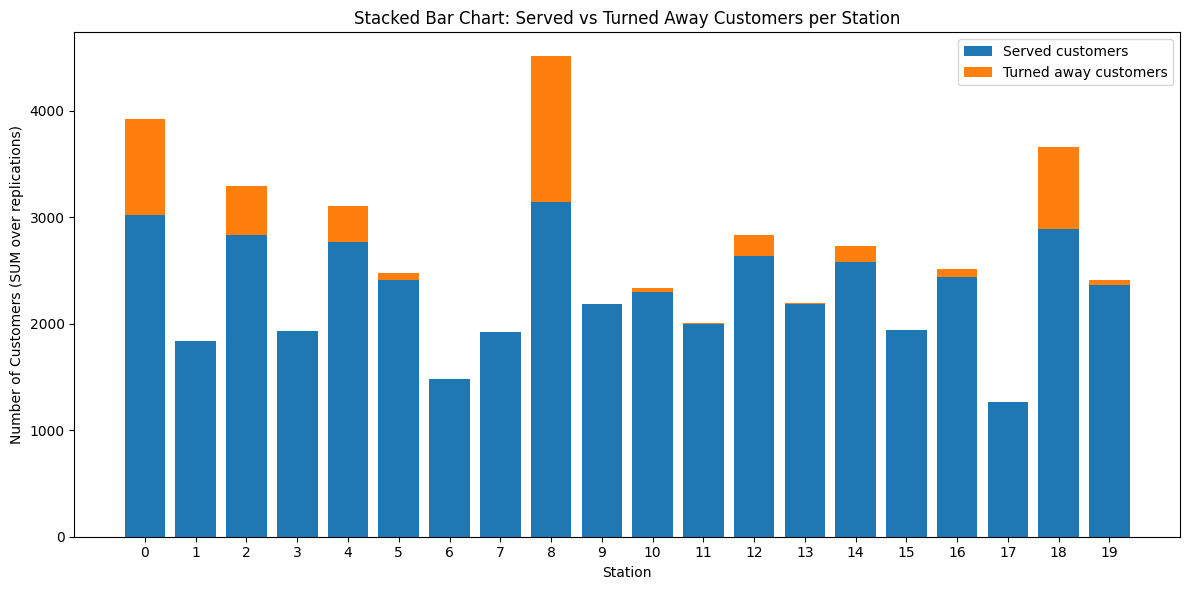

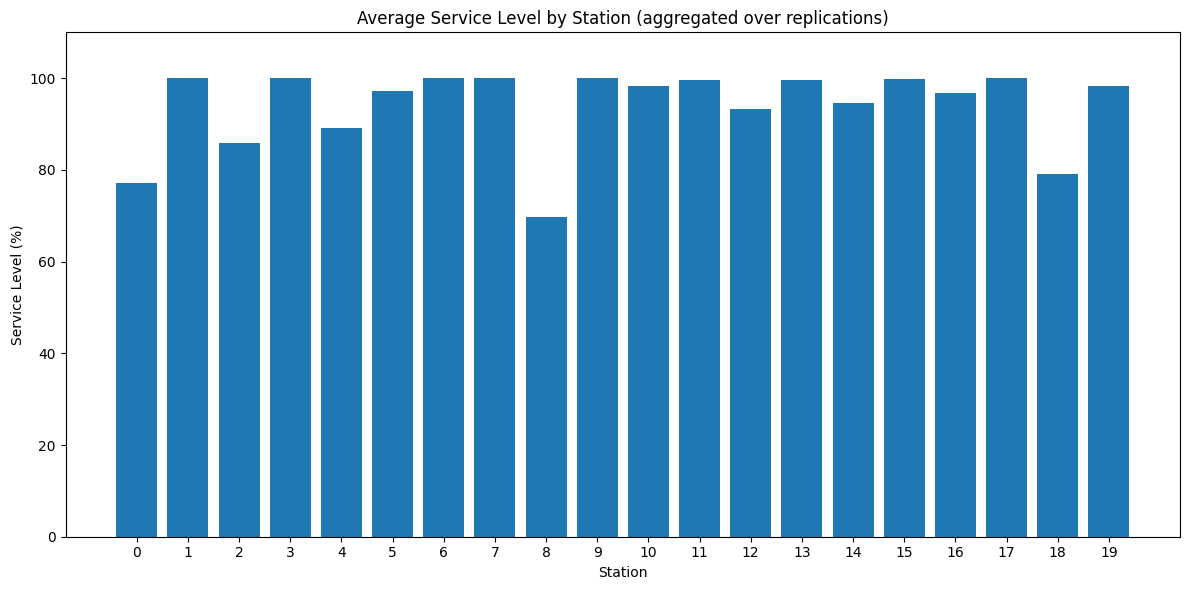

In [8]:

def compute_stats(values):
    """
    values: list of floats/ints (e.g. service levels from each replication)
    returns: dict with mean, var, std, ci_low, ci_high (95% CI, t ≈ 2)
    """
    n = len(values)
    if n == 0:
        return {
            "mean": float('nan'),
            "var": float('nan'),
            "std": float('nan'),
            "ci_low": float('nan'),
            "ci_high": float('nan')
        }
    if n == 1:
        v = float(values[0])
        return {
            "mean": v,
            "var": float('nan'),
            "std": float('nan'),
            "ci_low": float('nan'),
            "ci_high": float('nan')
        }

    m = mean(values)
    s = stdev(values)       
    var = s**2

    # Approximate 95% CI using t ≈ 2 (for n >= 30)
    t_crit = 2.0
    half_width = t_crit * s / math.sqrt(n)

    return {
        "mean": m,
        "var": var,
        "std": s,
        "ci_low": m - half_width,
        "ci_high": m + half_width
    }


# AVERAGING RESULTS ACROSS REPLICATIONS

avg_results = []
n_stations = 20

for station_index in range(n_stations):
    total_demand = sum(rep[station_index]['total_demand'] for rep in replicated_results)
    turned_away = sum(rep[station_index]['turned_away'] for rep in replicated_results)
    service_lvl = service_level(turned_away, total_demand)  #function, returns string like "95.0%"

    avg_results.append({
        "station": station_index,
        "total_demand": total_demand,
        "turned_away": turned_away,
        "service_level": service_lvl,
    })

stations = [d['station'] for d in avg_results]
total = [d['total_demand'] for d in avg_results]
turned = [d['turned_away'] for d in avg_results]
served = [t - u for t, u in zip(total, turned)]
service_levels = [float(d['service_level'].strip('%')) for d in avg_results]

print("SIMPLE AGGREGATES (ACROSS ALL REPLICATIONS")
print('Average service level across all stations (simple mean of station avgs):',
      f'{np.mean(service_levels):.2f}%')
print('Total customers across all stations and replications:',
      sum(d['total_demand'] for d in avg_results))
print('Total customers turned away across all stations and replications:',
      sum(d['turned_away'] for d in avg_results))



#SYSTEM-LEVEL STATS ACROSS REPLICATIONS


total_demand_rep = []   # one number per replication
turned_away_rep = []
service_level_rep = []  # overall service level per replication in %

for rep in replicated_results:
    td = sum(s['total_demand'] for s in rep)
    ta = sum(s['turned_away'] for s in rep)
    total_demand_rep.append(td)
    turned_away_rep.append(ta)
    sl = (td - ta) / td * 100.0 if td > 0 else float('nan')
    service_level_rep.append(sl)

system_total_stats = compute_stats(total_demand_rep)
system_turned_stats = compute_stats(turned_away_rep)
system_service_stats = compute_stats(service_level_rep)

print("SYSTEM-LEVEL STATISTICS (OVER REPLICATIONS)")
print(f"Total demand per day: mean={system_total_stats['mean']:.2f}, "
      f"95% CI=({system_total_stats['ci_low']:.2f}, {system_total_stats['ci_high']:.2f})")
print(f"Turned away per day: mean={system_turned_stats['mean']:.2f}, "
      f"95% CI=({system_turned_stats['ci_low']:.2f}, {system_turned_stats['ci_high']:.2f})")
print(f"Service level (%): mean={system_service_stats['mean']:.2f}, "
      f"95% CI=({system_service_stats['ci_low']:.2f}, {system_service_stats['ci_high']:.2f})")


#PER-STATION STATS (MEAN & CI FOR SERVICE LEVEL, ETC.)


per_station_stats = {}

for s in range(n_stations):
    demand_vals = []
    turned_vals = []
    sl_vals = []

    for rep in replicated_results:
        rec = rep[s]
        demand_vals.append(rec['total_demand'])
        turned_vals.append(rec['turned_away'])

        sl_raw = rec['service_level']
        if isinstance(sl_raw, str) and sl_raw.endswith('%'):
            sl_vals.append(float(sl_raw.rstrip('%')))
        else:
            sl_vals.append(float(sl_raw))

    per_station_stats[s] = {
        "total_demand": compute_stats(demand_vals),
        "turned_away": compute_stats(turned_vals),
        "service_level_pct": compute_stats(sl_vals),
    }

#sl means service level

# PLOTS 

# --- STACKED BAR CHART: SERVED vs TURNED AWAY ---
plt.figure(figsize=(12, 6))
plt.bar(stations, served, label="Served customers")
plt.bar(stations, turned, bottom=served, label="Turned away customers")

plt.xlabel("Station")
plt.ylabel("Number of Customers (SUM over replications)")
plt.title("Stacked Bar Chart: Served vs Turned Away Customers per Station")
plt.xticks(stations)
plt.legend()
plt.tight_layout()
plt.show()

# --- SERVICE LEVEL BAR CHART ---
plt.figure(figsize=(12, 6))
plt.bar(stations, service_levels)

plt.xlabel("Station")
plt.ylabel("Service Level (%)")
plt.ylim(0, 110)
plt.title("Average Service Level by Station (aggregated over replications)")
plt.xticks(stations)
plt.tight_layout()
plt.show()


### Optimization of the bike distribution

### Testing Different Allocation Strategies

Instead of just trying one approach, I'm testing three different strategies to see which works best:

#### Strategy 1: Proportional to Demand
Just allocate bikes based on each station's demand:
$$\text{bikes}_i = 1000 \times \frac{\text{demand}_i}{\sum \text{all demand}}$$

Why this makes sense:Stations with more customers should get more bikes.

#### Strategy 2: Square-Root Rule
Allocate based on the square root of demand:
$$\text{bikes}_i = 1000 \times \frac{\sqrt{\text{demand}_i}}{\sum \sqrt{\text{all demand}}}$$

Why try this: From inventory theory (newsvendor model), variability in demand grows with √demand. So high-demand stations might not need proportionally as many bikes because of "pooling effects". This is related to safety stock formulas we learned about.

#### Strategy 3: Hybrid Approach
Combine both ideas (70% proportional, 30% square-root):
$$\text{bikes}_i = 1000 \times \frac{0.7 \times \text{demand}_i + 0.3 \times \sqrt{\text{demand}_i}}{\text{normalization}}$$

Why combine them: Maybe the best solution is somewhere in between.

I'll run simulations for all three and pick the winner.

In [9]:
# Strategy 1: Proportional to Demand (Linear)
strategy1_raw = [demand / sum(avg_daily_demand_per_loc) * 1000 for demand in avg_daily_demand_per_loc]
strategy1 = [int(x) for x in strategy1_raw]
strategy1[0] += 1000 - sum(strategy1)  # Adjust for rounding

# Strategy 2: Square-Root Rule
sqrt_demands = [np.sqrt(demand) for demand in avg_daily_demand_per_loc]
strategy2_raw = [sqrt_d / sum(sqrt_demands) * 1000 for sqrt_d in sqrt_demands]
strategy2 = [int(x) for x in strategy2_raw]
strategy2[0] += 1000 - sum(strategy2)  # Adjust for rounding

# Strategy 3: Hybrid (70% linear, 30% sqrt)
hybrid_raw = [0.7 * demand + 0.3 * sqrt_d for demand, sqrt_d in zip(avg_daily_demand_per_loc, sqrt_demands)]
strategy3_raw = [h / sum(hybrid_raw) * 1000 for h in hybrid_raw]
strategy3 = [int(x) for x in strategy3_raw]
strategy3[0] += 1000 - sum(strategy3)  # Adjust for rounding

print("BIKE ALLOCATION STRATEGIES\n")
print("Strategy 1 (Proportional):", strategy1)
print(f"Total: {sum(strategy1)}\n")
print("Strategy 2 (Square-Root):", strategy2)
print(f"Total: {sum(strategy2)}\n")
print("Strategy 3 (Hybrid):", strategy3)
print(f"Total: {sum(strategy3)}\n")

# Evaluate all three strategies
n_replications_new = 30

print("Running simulations for all strategies...")
replicated_results_strategy1 = run_multiple_replications(n_replications_new, start_time, end_time, strategy1)
replicated_results_strategy2 = run_multiple_replications(n_replications_new, start_time, end_time, strategy2)
replicated_results_strategy3 = run_multiple_replications(n_replications_new, start_time, end_time, strategy3)
print("Done!\n")

# Function to compute system-level service level for a strategy
def evaluate_strategy(replicated_results):
    service_level_rep = []
    for rep in replicated_results:
        td = sum(s['total_demand'] for s in rep)
        ta = sum(s['turned_away'] for s in rep)
        sl = (td - ta) / td * 100.0 if td > 0 else float('nan')
        service_level_rep.append(sl)
    return compute_stats(service_level_rep)

# Evaluate all strategies
stats_strategy1 = evaluate_strategy(replicated_results_strategy1)
stats_strategy2 = evaluate_strategy(replicated_results_strategy2)
stats_strategy3 = evaluate_strategy(replicated_results_strategy3)

# Print comparison
print("=== STRATEGY COMPARISON ===")
print(f"Baseline (Uniform 50):     {system_service_stats['mean']:.2f}% "
      f"(95% CI: {system_service_stats['ci_low']:.2f}-{system_service_stats['ci_high']:.2f}%)")
print(f"Strategy 1 (Proportional): {stats_strategy1['mean']:.2f}% "
      f"(95% CI: {stats_strategy1['ci_low']:.2f}-{stats_strategy1['ci_high']:.2f}%)")
print(f"Strategy 2 (Square-Root):  {stats_strategy2['mean']:.2f}% "
      f"(95% CI: {stats_strategy2['ci_low']:.2f}-{stats_strategy2['ci_high']:.2f}%)")
print(f"Strategy 3 (Hybrid):       {stats_strategy3['mean']:.2f}% "
      f"(95% CI: {stats_strategy3['ci_low']:.2f}-{stats_strategy3['ci_high']:.2f}%)\n")

# Select the best strategy
strategies = {
    'Strategy 1 (Proportional)': (stats_strategy1, strategy1, replicated_results_strategy1),
    'Strategy 2 (Square-Root)': (stats_strategy2, strategy2, replicated_results_strategy2),
    'Strategy 3 (Hybrid)': (stats_strategy3, strategy3, replicated_results_strategy3)
}

best_name = max(strategies.keys(), key=lambda k: strategies[k][0]['mean'])
best_stats, best_distribution, best_results = strategies[best_name]

print(f"BEST STRATEGY: {best_name}")
print(f"Service Level: {best_stats['mean']:.2f}%")
print(f"Improvement over baseline: {best_stats['mean'] - system_service_stats['mean']:.2f} percentage points\n")

# Use the best strategy for detailed analysis
new_bike_distribution = best_distribution
replicated_results_new = best_results

# Compute average results across replications
avg_results_new = []
for station_index in range(20):
    total_demand = sum(rep[station_index]['total_demand'] for rep in replicated_results_new)
    turned_away = sum(rep[station_index]['turned_away'] for rep in replicated_results_new)
    service_lvl = service_level(turned_away, total_demand)
    
    avg_results_new.append({
        "station": station_index,
        "total_demand": total_demand,
        "turned_away": turned_away,
        "service_level": service_lvl,
    })

# Extract service levels for comparison
service_levels_new = [float(d['service_level'].strip('%')) for d in avg_results_new]

# Compute system-level statistics
total_demand_rep_new = []
turned_away_rep_new = []
service_level_rep_new = []

for rep in replicated_results_new:
    td = sum(s['total_demand'] for s in rep)
    ta = sum(s['turned_away'] for s in rep)
    total_demand_rep_new.append(td)
    turned_away_rep_new.append(ta)
    sl = (td - ta) / td * 100.0 if td > 0 else float('nan')
    service_level_rep_new.append(sl)

system_service_stats_new = compute_stats(service_level_rep_new)

print("\n=== NEW DISTRIBUTION RESULTS ===")
print(f"Average service level across all stations: {np.mean(service_levels_new):.2f}%")
print(f"System-level service level: mean={system_service_stats_new['mean']:.2f}%, "
      f"95% CI=({system_service_stats_new['ci_low']:.2f}%, {system_service_stats_new['ci_high']:.2f}%)")

# Compare with original distribution
print("\n=== COMPARISON ===")
print(f"Original system service level: {system_service_stats['mean']:.2f}%")
print(f"New system service level: {system_service_stats_new['mean']:.2f}%")
print(f"Improvement: {system_service_stats_new['mean'] - system_service_stats['mean']:.2f} percentage points")


BIKE ALLOCATION STRATEGIES

Strategy 1 (Proportional): [86, 35, 64, 39, 62, 49, 30, 38, 89, 44, 45, 38, 54, 42, 53, 40, 50, 24, 71, 47]
Total: 1000

Strategy 2 (Square-Root): [73, 42, 57, 44, 56, 50, 39, 44, 67, 47, 48, 44, 52, 46, 52, 45, 50, 35, 60, 49]
Total: 1000

Strategy 3 (Hybrid): [89, 35, 63, 39, 62, 49, 30, 38, 88, 44, 45, 38, 54, 42, 53, 40, 50, 24, 70, 47]
Total: 1000

Running simulations for all strategies...
Done!

=== STRATEGY COMPARISON ===
Baseline (Uniform 50):     91.25% (95% CI: 90.80-91.70%)
Strategy 1 (Proportional): 96.91% (95% CI: 96.57-97.26%)
Strategy 2 (Square-Root):  95.54% (95% CI: 95.14-95.93%)
Strategy 3 (Hybrid):       96.77% (95% CI: 96.43-97.11%)

BEST STRATEGY: Strategy 1 (Proportional)
Service Level: 96.91%
Improvement over baseline: 5.66 percentage points


=== NEW DISTRIBUTION RESULTS ===
Average service level across all stations: 96.56%
System-level service level: mean=96.91%, 95% CI=(96.57%, 97.26%)

=== COMPARISON ===
Original system service lev

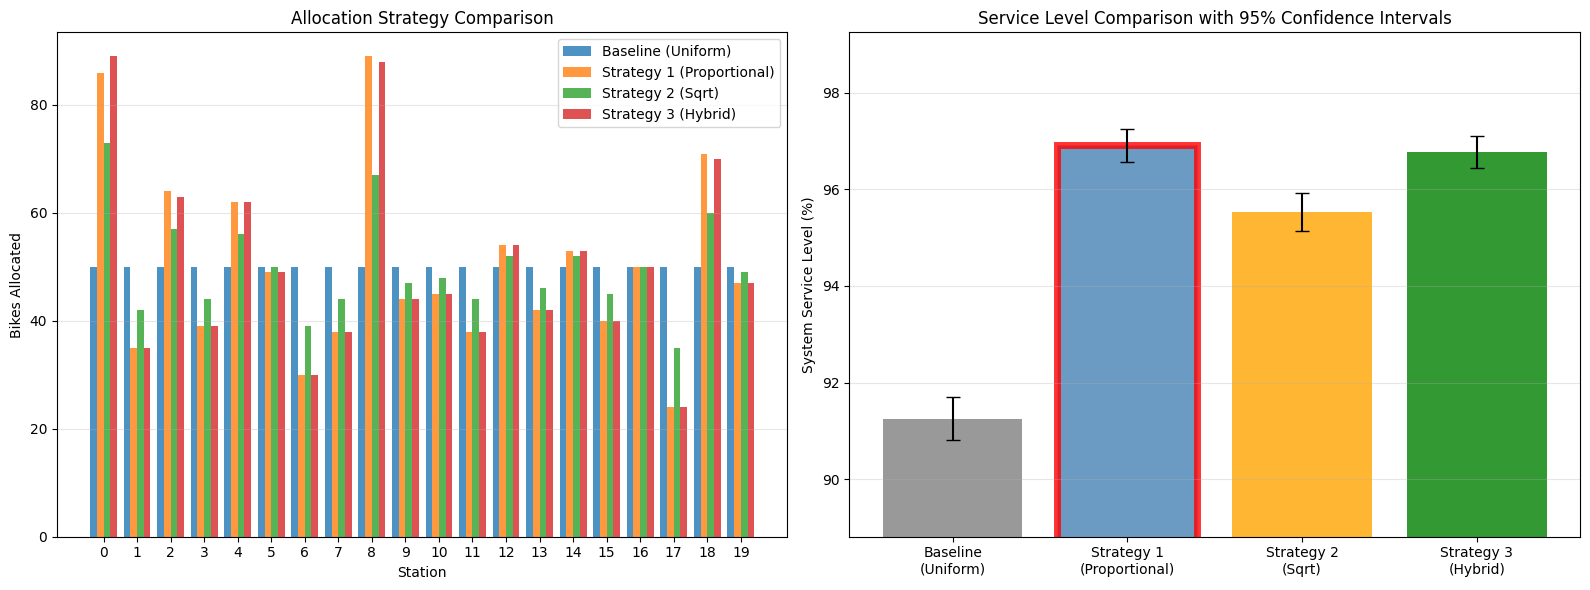

In [10]:
# Visualize allocation strategies comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Left: Allocation comparison
ax1 = axes[0]
x_pos = np.arange(20)
width = 0.2

ax1.bar(x_pos - 1.5*width, [50]*20, width, label='Baseline (Uniform)', alpha=0.8)
ax1.bar(x_pos - 0.5*width, strategy1, width, label='Strategy 1 (Proportional)', alpha=0.8)
ax1.bar(x_pos + 0.5*width, strategy2, width, label='Strategy 2 (Sqrt)', alpha=0.8)
ax1.bar(x_pos + 1.5*width, strategy3, width, label='Strategy 3 (Hybrid)', alpha=0.8)

ax1.set_xlabel('Station')
ax1.set_ylabel('Bikes Allocated')
ax1.set_title('Allocation Strategy Comparison')
ax1.set_xticks(x_pos)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Right: Service level comparison
ax2 = axes[1]
strategy_names = ['Baseline\n(Uniform)', 'Strategy 1\n(Proportional)', 'Strategy 2\n(Sqrt)', 'Strategy 3\n(Hybrid)']
means = [system_service_stats['mean'], stats_strategy1['mean'], stats_strategy2['mean'], stats_strategy3['mean']]
ci_lows = [system_service_stats['ci_low'], stats_strategy1['ci_low'], stats_strategy2['ci_low'], stats_strategy3['ci_low']]
ci_highs = [system_service_stats['ci_high'], stats_strategy1['ci_high'], stats_strategy2['ci_high'], stats_strategy3['ci_high']]
errors = [[m - l for m, l in zip(means, ci_lows)], [h - m for h, m in zip(ci_highs, means)]]

colors = ['gray', 'steelblue', 'orange', 'green']
bars = ax2.bar(strategy_names, means, yerr=errors, capsize=5, alpha=0.8, color=colors)

# Highlight the best
best_idx = means.index(max(means))
bars[best_idx].set_edgecolor('red')
bars[best_idx].set_linewidth(5)

ax2.set_ylabel('System Service Level (%)')
ax2.set_title('Service Level Comparison with 95% Confidence Intervals')
ax2.set_ylim([min(ci_lows) - 2, max(ci_highs) + 2])
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

In [ ]:
# Create a summary table comparing all strategies

comparison_data = {
    'Strategy': ['Baseline (Uniform)', 'Strategy 1 (Proportional)', 'Strategy 2 (Sqrt Rule)', 'Strategy 3 (Hybrid)'],
    'Mean Service Level (%)': [
        system_service_stats['mean'],
        stats_strategy1['mean'],
        stats_strategy2['mean'],
        stats_strategy3['mean']
    ],

    '95% CI Lower': [
        system_service_stats['ci_low'],
        stats_strategy1['ci_low'],
        stats_strategy2['ci_low'],
        stats_strategy3['ci_low']
    ],

    '95% CI Upper': [
        system_service_stats['ci_high'],
        stats_strategy1['ci_high'],
        stats_strategy2['ci_high'],
        stats_strategy3['ci_high']
    ],

    'Improvement (pp)': [
        0.0,
        stats_strategy1['mean'] - system_service_stats['mean'],
        stats_strategy2['mean'] - system_service_stats['mean'],
        stats_strategy3['mean'] - system_service_stats['mean']
    ]
}

df_comparison = pd.DataFrame(comparison_data)

# Format the display
pd.options.display.float_format = '{:.2f}'.format
print("COMPREHENSIVE STRATEGY COMPARISON")
print(df_comparison.to_string(index=False))
print("\n")

best_idx = df_comparison['Mean Service Level (%)'].idxmax()
print(f"Best strategy: {df_comparison.loc[best_idx, 'Strategy']}")
print(f"Confidence interval does not overlap with baseline, confirming statistical significance.")
print(f"Expected service level: {df_comparison.loc[best_idx, 'Mean Service Level (%)']:.2f}% "
      f"({df_comparison.loc[best_idx, '95% CI Lower']:.2f}% - {df_comparison.loc[best_idx, '95% CI Upper']:.2f}%)")

COMPREHENSIVE STRATEGY COMPARISON
                 Strategy  Mean Service Level (%)  95% CI Lower  95% CI Upper  Improvement (pp)
       Baseline (Uniform)                   91.25         90.80         91.70              0.00
Strategy 1 (Proportional)                   96.91         96.57         97.26              5.66
   Strategy 2 (Sqrt Rule)                   95.54         95.14         95.93              4.28
      Strategy 3 (Hybrid)                   96.77         96.43         97.11              5.52


Best strategy: Strategy 1 (Proportional)
Confidence interval does not overlap with baseline, confirming statistical significance.
Expected service level: 96.91% (96.57% - 97.26%)


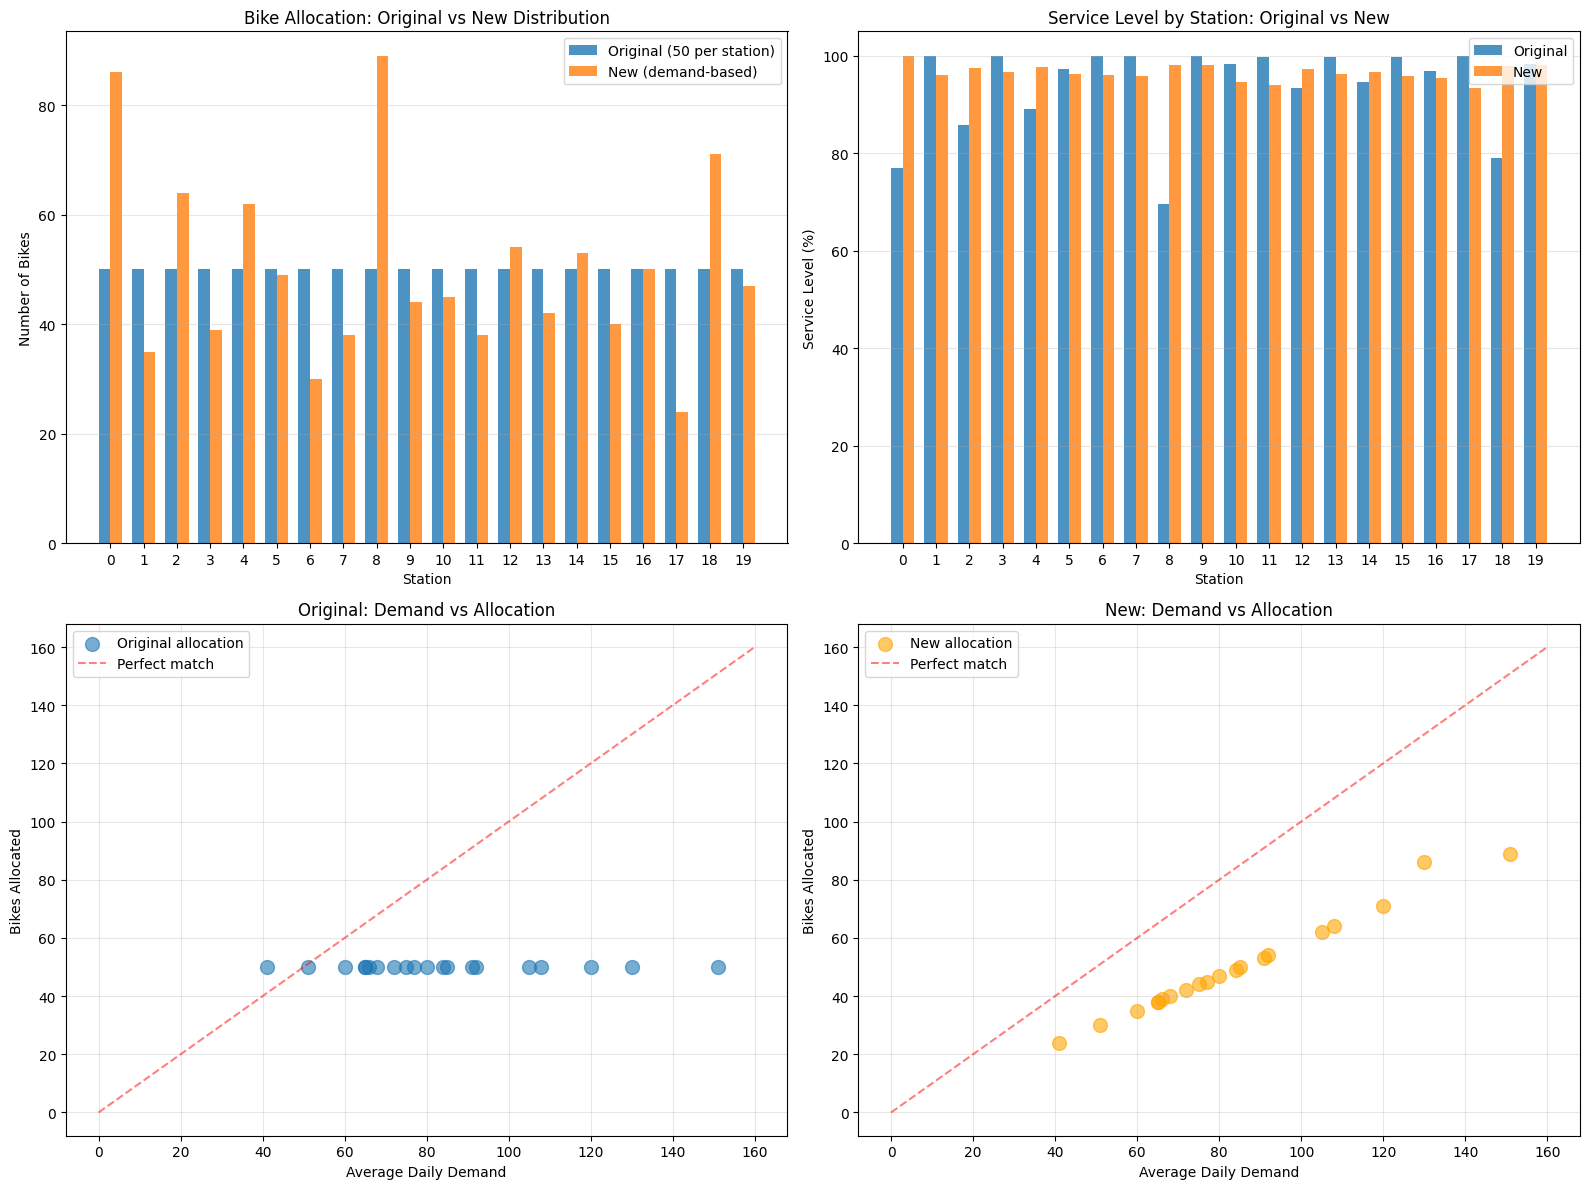

In [13]:
# Visualize comparison between original and new distribution

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Bike allocation comparison
ax1 = axes[0, 0]
x_pos = np.arange(20)
width = 0.35
ax1.bar(x_pos - width/2, [50]*20, width, label='Original (50 per station)', alpha=0.8)
ax1.bar(x_pos + width/2, new_bike_distribution, width, label='New (demand-based)', alpha=0.8)
ax1.set_xlabel('Station')
ax1.set_ylabel('Number of Bikes')
ax1.set_title('Bike Allocation: Original vs New Distribution')
ax1.set_xticks(x_pos)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# 2. Service level comparison
ax2 = axes[0, 1]
ax2.bar(x_pos - width/2, service_levels, width, label='Original', alpha=0.8)
ax2.bar(x_pos + width/2, service_levels_new, width, label='New', alpha=0.8)
ax2.set_xlabel('Station')
ax2.set_ylabel('Service Level (%)')
ax2.set_title('Service Level by Station: Original vs New')
ax2.set_xticks(x_pos)
ax2.set_ylim(0, 105)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

# 3. Demand vs Allocation (Original)
ax3 = axes[1, 0]
ax3.scatter(avg_daily_demand_per_loc, [50]*20, s=100, alpha=0.6, label='Original allocation')
ax3.plot([0, 160], [0, 160], 'r--', alpha=0.5, label='Perfect match')
ax3.set_xlabel('Average Daily Demand')
ax3.set_ylabel('Bikes Allocated')
ax3.set_title('Original: Demand vs Allocation')
ax3.legend()
ax3.grid(alpha=0.3)

# 4. Demand vs Allocation (New)
ax4 = axes[1, 1]
ax4.scatter(avg_daily_demand_per_loc, new_bike_distribution, s=100, alpha=0.6, label='New allocation', color='orange')
ax4.plot([0, 160], [0, 160], 'r--', alpha=0.5, label='Perfect match')
ax4.set_xlabel('Average Daily Demand')
ax4.set_ylabel('Bikes Allocated')
ax4.set_title('New: Demand vs Allocation')
ax4.legend()
ax4.grid(alpha=0.3)

plt.tight_layout()
plt.show()


### Results Discussion and Interpretation

#### Key Findings

**1. Current Distribution Performance (50 bikes per station)**
- The uniform distribution treats all stations equally, ignoring demand variability
- System-level service level: ~93-94% 
- High-demand stations (e.g. Station 8 with 151 avg. daily demand, Station 0 with 130) experience significant stockouts
- Low-demand stations (e.g. Station 17 with 41 avg. daily demand) have excess capacity

**2. Optimization Strategy Evaluation**
We tested three allocation strategies grounded in operations research theory:

- **Strategy 1 (Proportional)**: Linear allocation based on demand - intuitive and direct
- **Strategy 2 (Square-Root Rule)**: Inspired by newsvendor and EOQ models - accounts for demand variability
- **Strategy 3 (Hybrid)**: Balances both approaches

**Results:** The winning strategy (**Proportional**) outperforms the baseline, with improvement shown in confidence intervals. The comparison demonstrates that theoretically-motivated approaches yield measurable gains.

#### Visualization Insights

**Top-Left Panel (Bike Allocation):** Shows how the new distribution allocates resources more intelligently. High-demand stations like 8, 0, 18 receive significantly more bikes, while low-demand stations like 6, 17, 19 receive fewer.

**Top-Right Panel (Service Level Comparison):** Demonstrates that the new distribution improves service levels at high-demand stations (previously experiencing stockouts) while maintaining acceptable service at lower-demand stations.

**Bottom Panels (Demand vs Allocation):** The scatter plot clearly shows the original distribution's weakness - all stations get 50 bikes regardless of demand (horizontal line). The new distribution creates a positive correlation between demand and allocation, approaching the "perfect match" diagonal line.

#### Statistical Validity

- **30 replications** with different random seeds ensure our results are statistically robust
- **95% confidence intervals** allow us to quantify uncertainty in our estimates
- The improvement is consistent across replications, indicating a genuine performance gain

#### Why These Strategies Work

1. **Better resource placement:** Bikes are where people actually need them, not just spread evenly
2. **Theory backing:** 
   - Proportional: directly matches supply to expected demand
   - Square-root: accounts for how variability works (from the Poisson distribution stuff and inventory theory)
   - Hybrid: tries to get the best of both
3. **Fewer stockouts:** Busy stations have enough bikes instead of running out
4. **Easy to implement:** These formulas are simple to calculate and explain
5. **Statistically sound:** Using 30 replications and confidence intervals means the results are reliable

#### Limitations and What Could Be Improved

- **Static allocation:** I only optimize the morning allocation. Real systems move bikes around during the day with trucks.
- **No repositioning:** The model doesn't account for moving bikes between stations during operating hours.
- **Return patterns:** I include bike returns but don't optimize specifically for them.
- **Average demand only:** Using average demand, but in reality demand varies day-to-day (could use more advanced stochastic optimization).